In [1]:
# We are using pandas, numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
org_data = np.array([[126, 78],
[128, 80],
[128, 82],
[130, 82],
[130, 84],
[132, 86]])

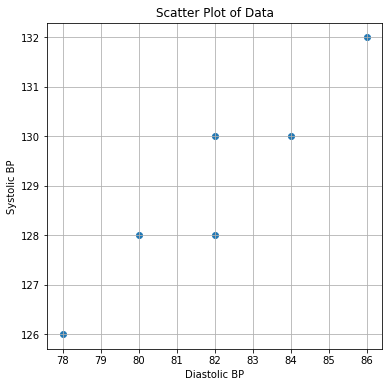

In [3]:
x_values = org_data[:, 1]  # Second column on x-axis
y_values = org_data[:, 0]  # First column on y-axis

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(x_values, y_values)
plt.xlabel('Diastolic BP')
plt.ylabel('Systolic BP')
plt.title('Scatter Plot of Data')
plt.grid(True)
plt.show()

In [4]:
# Subtract mean from data
mean = np.mean(org_data, axis=0)
print("Mean ", mean.shape)
mean_data = org_data - mean
print("Data after subtracting mean ", mean_data.shape, "\n")

# Compute covariance matrix
cov = np.cov(mean_data.T)
cov = np.round(cov, 2)
print("Covariance matrix ", cov.shape, "\n")
print(cov)

Mean  (2,)
Data after subtracting mean  (6, 2) 

Covariance matrix  (2, 2) 

[[4.4 5.6]
 [5.6 8. ]]


In [5]:
mean_data.T

array([[-3., -1., -1.,  1.,  1.,  3.],
       [-4., -2.,  0.,  0.,  2.,  4.]])

In [6]:
# Perform eigen decomposition of covariance matrix
eig_val, eig_vec = np.linalg.eigh(cov)
print("Eigen vectors \n", eig_vec)
print("\n\nEigen values ", eig_val, "\n")
 


Eigen vectors 
 [[-0.80808699  0.58906316]
 [ 0.58906316  0.80808699]]


Eigen values  [ 0.31782353 12.08217647] 



In [7]:
eig_val.shape

(2,)

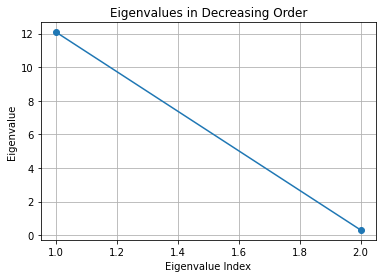

In [8]:
# Sort eigen values and corresponding eigen vectors in descending order
indices = np.argsort(eig_val)[::-1]
eig_val = eig_val[indices]
eig_vec = eig_vec[:,indices]
 
# Plot the eigenvalues
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(eig_val) + 1), eig_val, marker='o')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues in Decreasing Order')
plt.grid(True)
plt.show() 

In [9]:
indices

array([1, 0], dtype=int64)

In [10]:
# Sort the eigenvalues and eigenvectors in decreasing order
eigenvalues = eig_val
eigenvectors = eig_vec
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
 
# Choose the feature vector for two principal components
num_components = 1
feature_vector = sorted_eigenvectors[:, :num_components]
 
print("Feature Vector:")
print(feature_vector)

Feature Vector:
[[0.58906316]
 [0.80808699]]


In [11]:
feature_vector

array([[0.58906316],
       [0.80808699]])

Reduced Data Matrix:
[[137.25274406]
 [140.04704438]
 [141.66321837]
 [142.84134469]
 [144.45751868]
 [147.25181899]]


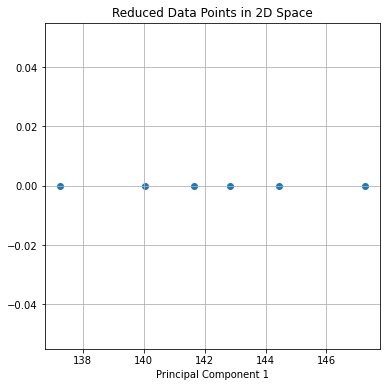

In [12]:
# Project the original data onto the feature vector
reduced_data = np.dot(org_data, feature_vector)

print("Reduced Data Matrix:")
print(reduced_data)

# Plot the reduced data points in 2D space
plt.figure(figsize=(6, 6))
plt.scatter(reduced_data[:, 0], np.zeros(reduced_data.shape[0]))
plt.xlabel('Principal Component 1')
plt.title('Reduced Data Points in 2D Space')
plt.grid(True)
plt.show()
